## K-Means Clustering

Импорт библиотек и датасета.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('University_prep.csv', sep=';')
df

,Number_students,Numb_students_per_Staff,International_Students,Percentage_Female,Percentage_Male,Teaching,Citations,GDP,Industry_Income
0,20664.0,11.2,8472.0,0.46,0.54,90.5,98.4,41627.0,65.5
1,2240.0,6.4,672.0,0.34,0.66,92.1,97.9,60236.0,88.0
2,18978.0,10.9,7022.0,0.47,0.53,91.4,95.8,41627.0,59.3
3,16135.0,7.3,3711.0,0.43,0.57,92.8,99.9,60236.0,66.2
4,11247.0,8.6,3824.0,0.39,0.61,90.5,99.5,60236.0,86.9
...,...,...,...,...,...,...,...,...,...
1351,20174.0,17.8,0.0,0.55,0.45,16.2,6.1,14064.0,35.6
1352,34101.0,21.3,0.0,0.57,0.43,15.3,6.7,14064.0,35.1
1353,15236.0,11.1,3.0,0.63,0.37,17.0,4.5,28053.0,36.9
1354,17101.0,24.9,0.0,0.54,0.46,13.8,7.6,14064.0,35.0


Проводим шкалирование.

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df = sc.transform(df)
df = pd.DataFrame(df, columns = ['Number_students','Numb_students_per_Staff','International_Students','Percentage_Female','Percentage_Male','Teaching','Citations','GDP','Industry_Income']).round()

Для того, чтобы определить оптимальное количество кластеров, используем метод локтя. Видим, что можно выбрать либо 2 (что совсем скучно), либо 3, либо 5 кластеров. 

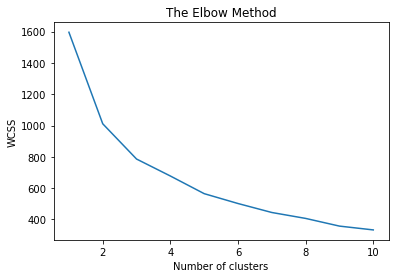

In [4]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Используем ещё один метод для окончательного определения - метод силуэта. Максимальное значение на 5 кластерах.

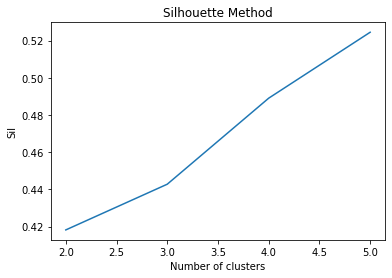

2:0.4182441414100884
3:0.4428063175625075
4:0.48903601164479005
5:0.5244621155785775


In [5]:
from sklearn.metrics import silhouette_score

sil = []

for k in range(2, 6):
  kmeans = KMeans(n_clusters = k).fit(df)  
  preds = kmeans.fit_predict(df)
  sil.append(silhouette_score(df, preds, metric = 'euclidean'))


plt.plot(range(2, 6), sil)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

for i in range(len(sil)):
 print(str(i+2) +":"+ str(sil[i]))

Пока можем сказать, что с таким количеством не всегда значимых переменных очень сложно дать интерпретацию полученным кластерам. Поэтому предлагаю перейти к построению только на значимых переменных.

In [6]:
km = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0).fit_predict(df)
kms = KMeans(n_clusters = 5, random_state = 0).fit(df)
pd.DataFrame(kms.cluster_centers_, columns = ['Number_students','Numb_students_per_Staff','International_Students','Percentage_Female','Percentage_Male','Teaching','Citations','GDP','Industry_Income'])

,Number_students,Numb_students_per_Staff,International_Students,Percentage_Female,Percentage_Male,Teaching,Citations,GDP,Industry_Income
0,0.049669,3.973510e-02,0.261589,9.403974e-01,-1.665335e-16,3.311258e-02,1.000000e+00,1.942890e-16,0.099338
1,0.060241,0.000000e+00,0.028916,8.554217e-01,-3.885781e-16,-8.326673e-17,-6.106227e-16,5.783133e-02,0.040964
2,0.037681,0.000000e+00,0.011594,-3.330669e-16,1.000000e+00,2.028986e-02,-1.665335e-16,2.318841e-02,0.150725
3,0.017241,-1.734723e-18,0.181034,8.448276e-01,3.885781e-16,2.068966e-01,9.913793e-01,1.000000e+00,0.094828
4,0.050562,3.932584e-02,0.224719,-2.220446e-16,9.325843e-01,2.303371e-01,1.000000e+00,3.089888e-01,0.269663


Теперь проведём кластеризацию только на значимых переменных.

In [7]:
X = df.iloc[:, [3,6,7]]

Видим, что университеты были поделены на 5 кластеров.
1. Преобладает % женщин, высокий уровень упоминания в иностранных источниках,низкий ВВП 
2. Преобладает % мужчин, низкий уровень упоминания в иностранных источниках,низкий ВВП 
3. Преобладает % женщин, низкий уровень упоминания в иностранных источниках,низкий ВВП 
4. Преобладает % женщин, высокий уровень упоминания в иностранных источниках,высокий ВВП 
5. Преобладает % мужчин, высокий уровень упоминания в иностранных источниках,низкий ВВП 

In [8]:
km = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0).fit_predict(X)
kms = KMeans(n_clusters = 5, random_state = 0).fit(X)
pd.DataFrame(kms.cluster_centers_, columns = ['Percentage_Female','Citations','GDP']).round()

,Percentage_Female,Citations,GDP
0,1.0,1.0,0.0
1,-0.0,-0.0,0.0
2,1.0,-0.0,0.0
3,1.0,1.0,1.0
4,-0.0,1.0,0.0


In [9]:
import pickle
input = open('clust.pkl', 'rb')
obj = pickle.load(input)
input.close()
hc = obj["hc"]

Сравниваем результат кластеризации со всеми переменными и только со значимыми. Получили 72%, что неплохо.

In [10]:
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(hc,km)

0.6036666356090579

In [11]:
import pickle
obj = {'km': km}
output = open('clust-km.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()